In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
dfx = pd.read_csv('./data/Linear_X_Train.csv')
dfy = pd.read_csv('./data/Linear_Y_Train.csv')

x = dfx.values
y = dfy.values

x = x.reshape((-1,1))
y = y.reshape((-1,1))
print(y.min())
print(x.min())

-286.9597390920343
-3.5462993469993016


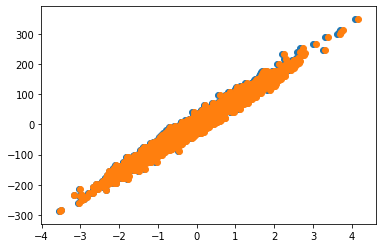

In [6]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()


In [99]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):
    
    theta = np.array([-300.0,0.0])
    
    itr = 0
    max_itr = 450
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list


In [100]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

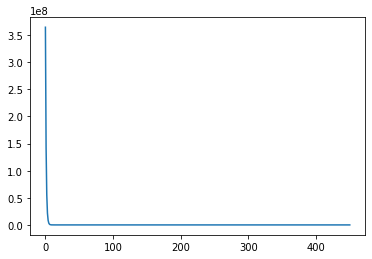

In [101]:
plt.plot(error_list)
plt.show()

In [102]:
print(final_theta)

[ 0.68386897 79.90573694]


In [104]:
dfX_test=pd.read_csv('./data/Linear_X_Test.csv')
xtest=dfX_test.values
xtest = xtest.reshape((-1,1))

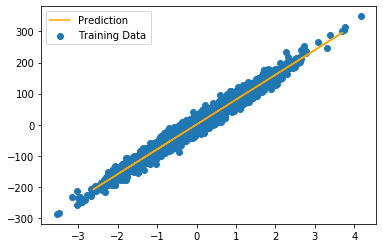

In [105]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()